<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF71_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab.patches import cv2_imshow

!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_71_80/imori.jpg

--2019-05-15 15:00:17--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_71_80/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-05-15 15:00:17 (127 MB/s) - ‘imori.jpg’ saved [12638/12638]



#71 マスキング

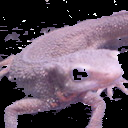

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32) / 255.

out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
##if min == B
ind = np.where(min_arg==0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
##if min == G
ind = np.where(min_arg==2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
##if min == R
ind = np.where(min_arg==1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300

V = max_v.copy()
S = max_v.copy() - min_v.copy()

#color tracking
mask = np.zeros_like(H)
mask[np.where((H>180) & (H<260))] = 255
mask = 1- mask 
out = img.copy() * 255.

for c in range(3):
    out[..., c] *= mask

cv2_imshow(out)

#72 マスキング(カラートラッキング＋モルフォロジー)

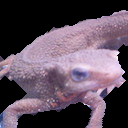

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32) / 255.

out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
##if min == B
ind = np.where(min_arg==0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
##if min == G
ind = np.where(min_arg==2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
##if min == R
ind = np.where(min_arg==1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300

V = max_v.copy()
S = max_v.copy() - min_v.copy()

# color tracking
mask = np.zeros_like(H)
mask[np.where((H>180) & (H<260))] = 255

h, w, _ = img.shape

# Closing
## Morphology filter
MF = np.array(((0, 1, 0),
               (1, 0, 1),
               (0, 1, 0)), dtype=np.int)

## Morphology - dilate
Dil_time = 5

for i in range(Dil_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mask[y-1, x-1] = 255
## Morphology - erode
Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mask[y-1, x-1] = 0

# Opening
## Morphology - erode
Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mask[y-1, x-1] = 0

## Morphology - dilate
Dil_time = 5

for i in range(Dil_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mask[y-1, x-1] = 255

# masking
cv2.imwrite("out_mask.png", mask.astype(np.uint8))

mask = 1 - mask / 255
out = img.copy() * 255.

for c in range(3):
    out[..., c] *= mask

out = out.astype(np.uint8)

cv2_imshow(out)

#73 縮小と拡大

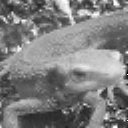

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

def resize(img, a):
    _h, _w  = img.shape
    h = int(a * _h)
    w = int(a * _w)
    y = np.arange(h).repeat(w).reshape(w, -1) #横幅の個数を取るのを繰り返しwに合わせて再整形する
    x = np.tile(np.arange(w), (h, 1))#タイル状で並べる（？）
    y = (y / a)
    x = (x / a)
    
    #切り上げ
    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    #小さいサイズに合わせる
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _w-2)
    
    #差を出す
    dx = x - ix
    dy = y - iy
    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out

p = resize(gray, 0.5)
p = resize(p, 2.)

out = p.astype(np.uint8)

# Save result
cv2_imshow(out)

#74 ピラミッド差分による高周波成分の抽出
Q.73で求めた画像と元画像の差分を求め、[0,255]に正規化

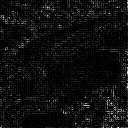

In [0]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

def resize(img, a):
    _h, _w  = img.shape
    h = int(a * _h)
    w = int(a * _w)
    y = np.arange(h).repeat(w).reshape(w, -1) #横幅の個数を取るのを繰り返しwに合わせて再整形する
    x = np.tile(np.arange(w), (h, 1))#タイル状で並べる（？）
    y = (y / a)
    x = (x / a)
    
    #切り上げ
    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    #小さいサイズに合わせる
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _w-2)
    
    #差を出す
    dx = x - ix
    dy = y - iy
    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out

p = resize(gray, 0.5)
p = resize(p, 2.)

out = np.abs(p - gray)
out = out / out.max() * 255 　#例えば0~230くらいの差だったものを一度0~1として表すことで0~255に正規化できる
out = out.astype(np.uint8)

cv2_imshow(out)

#75 ガウシアンピラミッド

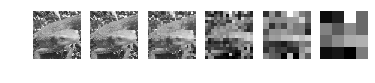

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]


def resize(img, a):
    
    _h, _w  = img.shape
    h = int(a * _h)
    w = int(a * _w)
    y = np.arange(h).repeat(w).reshape(w, -1) #横幅の個数を取るのを繰り返しwに合わせて再整形する
    x = np.tile(np.arange(w), (h, 1))#タイル状で並べる（？）
    y = (y / a)
    x = (x / a)
    
    #切り上げ
    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    #小さいサイズに合わせる
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _w-2)
    
    #差を出す
    dx = x - ix
    dy = y - iy
    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out

pyramid = [gray]

for i in range(1, 6):
    a = 2. ** i
    p = resize(gray, 1. / a)
    pyramid.append(p)
    
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(pyramid[i], cmap='gray')
    plt.axis('off')
    plt.xticks(color="None")
    plt.xticks(color="None")
    
plt.show()

#76 

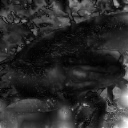

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

def resize(img, a):
    _h, _w  = img.shape
    h = int(a * _h)
    w = int(a * _w)
    """
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = np.floor(y / a).astype(np.int)
    x = np.floor(x / a).astype(np.int)
    y = np.minimum(y, _h-1)
    x = np.minimum(x, _w-1)
    out = img[y,x]
    """
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = (y / a)
    x = (x / a)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _w-2)

    dx = x - ix
    dy = y - iy
    #dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    #dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)
    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out

pyramid = [gray]
for i in range(1, 6):
    a = 2. ** i
    p = resize(gray, 1. / a)
    p = resize(p, a)
    pyramid.append(p)
    
out = np.zeros((H, W), dtype=np.float32)

out += np.abs(pyramid[0] - pyramid[1])
out += np.abs(pyramid[0] - pyramid[3])
out += np.abs(pyramid[0] - pyramid[5])
out += np.abs(pyramid[1] - pyramid[4])
out += np.abs(pyramid[2] - pyramid[3])
out += np.abs(pyramid[3] - pyramid[5])

out = out / out.max() * 255

out = out.astype(np.uint8)

cv2_imshow(out)